In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting as pd_plt
import pickle

from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    RepeatedStratifiedKFold, 
    StratifiedShuffleSplit, 
    StratifiedKFold, 
    cross_val_score,
    KFold
)
from sklearn.metrics import (
    classification_report, 
    precision_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score, 
    RocCurveDisplay, 
    DetCurveDisplay,
    accuracy_score,
    make_scorer, 
    mean_squared_error
)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import svm

from sklearn.compose import (
    ColumnTransformer, 
    make_column_selector, 
)
from sklearn.preprocessing import (
    MinMaxScaler, 
    StandardScaler, 
    RobustScaler, 
    Normalizer, 
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures, 
    KBinsDiscretizer, 
    FunctionTransformer
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.experimental import enable_halving_search_cv  # важно для включения HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97


# Более подробно рассмотрим имеющиеся данные

In [6]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


None

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.00000
mean,0.797227,61.746219,57.451551,3938.457274,5.728667,5.732720,3.53753
std,0.474440,1.420742,2.230915,3998.851904,1.123597,1.153284,0.70956
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.00000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.91000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.53000
75%,1.040000,62.500000,59.000000,5324.500000,6.540000,6.530000,4.03000
max,5.010000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.80000


Ну и дела с минимальными размерами, так себе ситуация

In [7]:
display(df[df.duplicated()],df[df.isna().any(axis = 1)])

,carat,cut,color,clarity,depth,table,price,x,y,z
868,1.00,Premium,F,VVS2,60.6,54.0,8924,6.56,6.52,3.96
11686,1.04,Premium,I,SI2,62.0,57.0,3774,6.53,6.47,4.03
12173,0.40,Premium,H,VS1,62.6,58.0,1035,4.71,4.68,2.94
12558,0.32,Ideal,E,VVS2,62.3,56.0,1080,4.40,4.37,2.73
13050,0.40,Premium,F,VS1,61.4,58.0,1050,4.75,4.73,2.91
...,...,...,...,...,...,...,...,...,...,...
39790,0.40,Premium,F,SI1,62.5,59.0,737,4.67,4.71,2.93
40006,0.30,Ideal,G,VS2,63.0,55.0,675,4.31,4.29,2.71
40181,1.21,Premium,H,SI2,61.9,55.0,5218,6.84,6.79,4.22
40388,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28


,carat,cut,color,clarity,depth,table,price,x,y,z


Пропусков нет, ну и славно

In [8]:
df.drop_duplicates(inplace = True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97


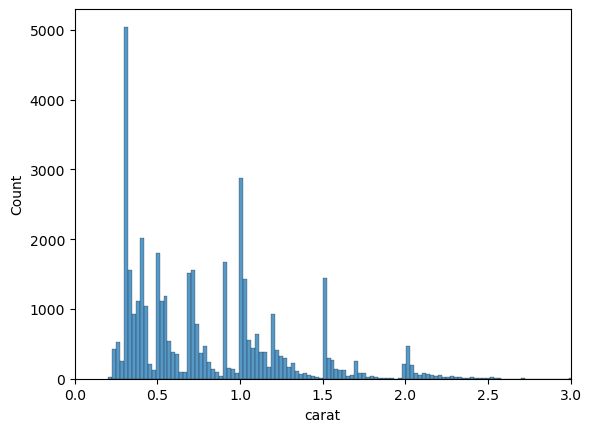

In [9]:
sns.histplot(data=df, x="carat", bins=200);
plt.xlim(0,3);

Присутствует __каратная цикличность__, которую можно заметить невооруженным глазом, поэтому попробую применит бининг на караты.

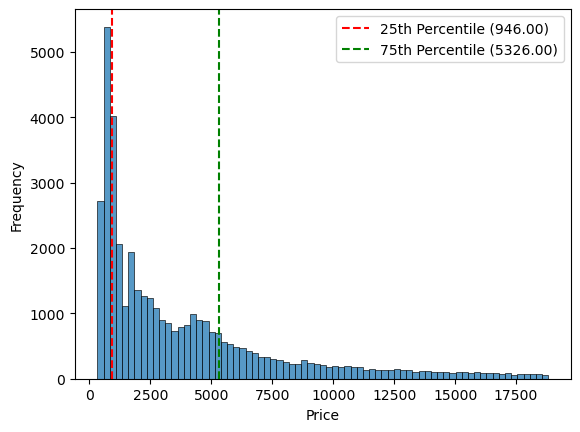

In [10]:
q25 = df['price'].quantile(0.25)
q75 = df['price'].quantile(0.75)

sns.histplot(df['price'])

plt.axvline(q25, color='red', linestyle='--', label=f'25th Percentile ({q25:.2f})')
plt.axvline(q75, color='green', linestyle='--', label=f'75th Percentile ({q75:.2f})')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show();

Интересно посмотреть на разные цены в зависимости от качества огранки и веса в каратах

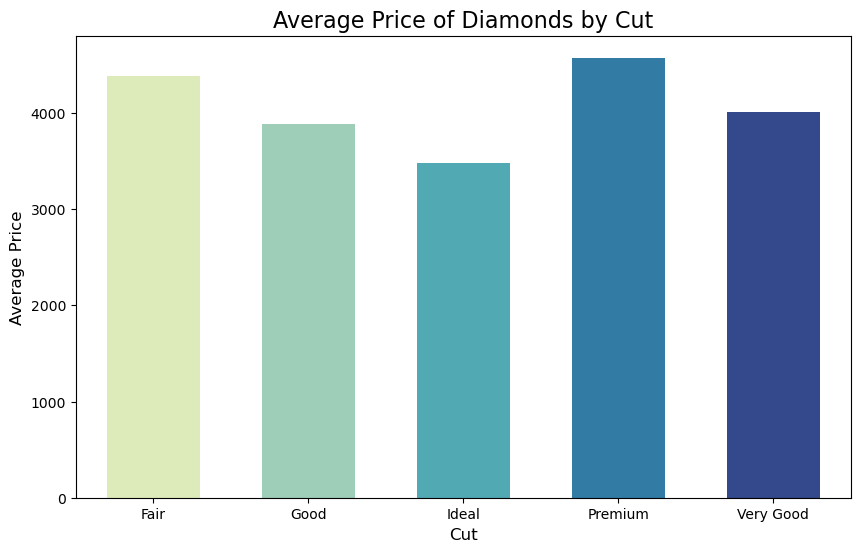

In [11]:
average_price_by_cut = df.groupby('cut')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_cut, x='cut', y='price', hue='cut', width=0.6,palette='YlGnBu')

plt.title('Average Price of Diamonds by Cut', fontsize=16)
plt.xlabel('Cut', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()

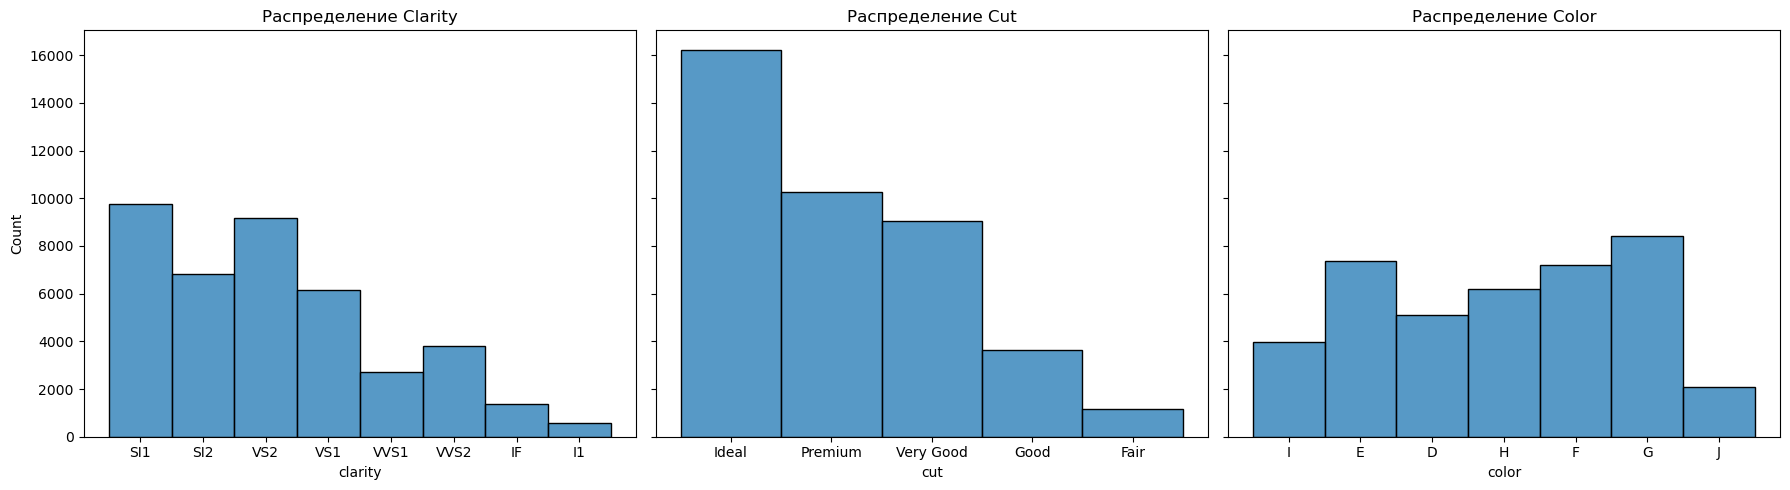

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  

sns.histplot(data=df, x='clarity', ax=axes[0])
axes[0].set_title('Распределение Clarity')

sns.histplot(data=df, x='cut', ax=axes[1])
axes[1].set_title('Распределение Cut')

sns.histplot(data=df, x='color', ax=axes[2])
axes[2].set_title('Распределение Color')

plt.tight_layout()
plt.show()

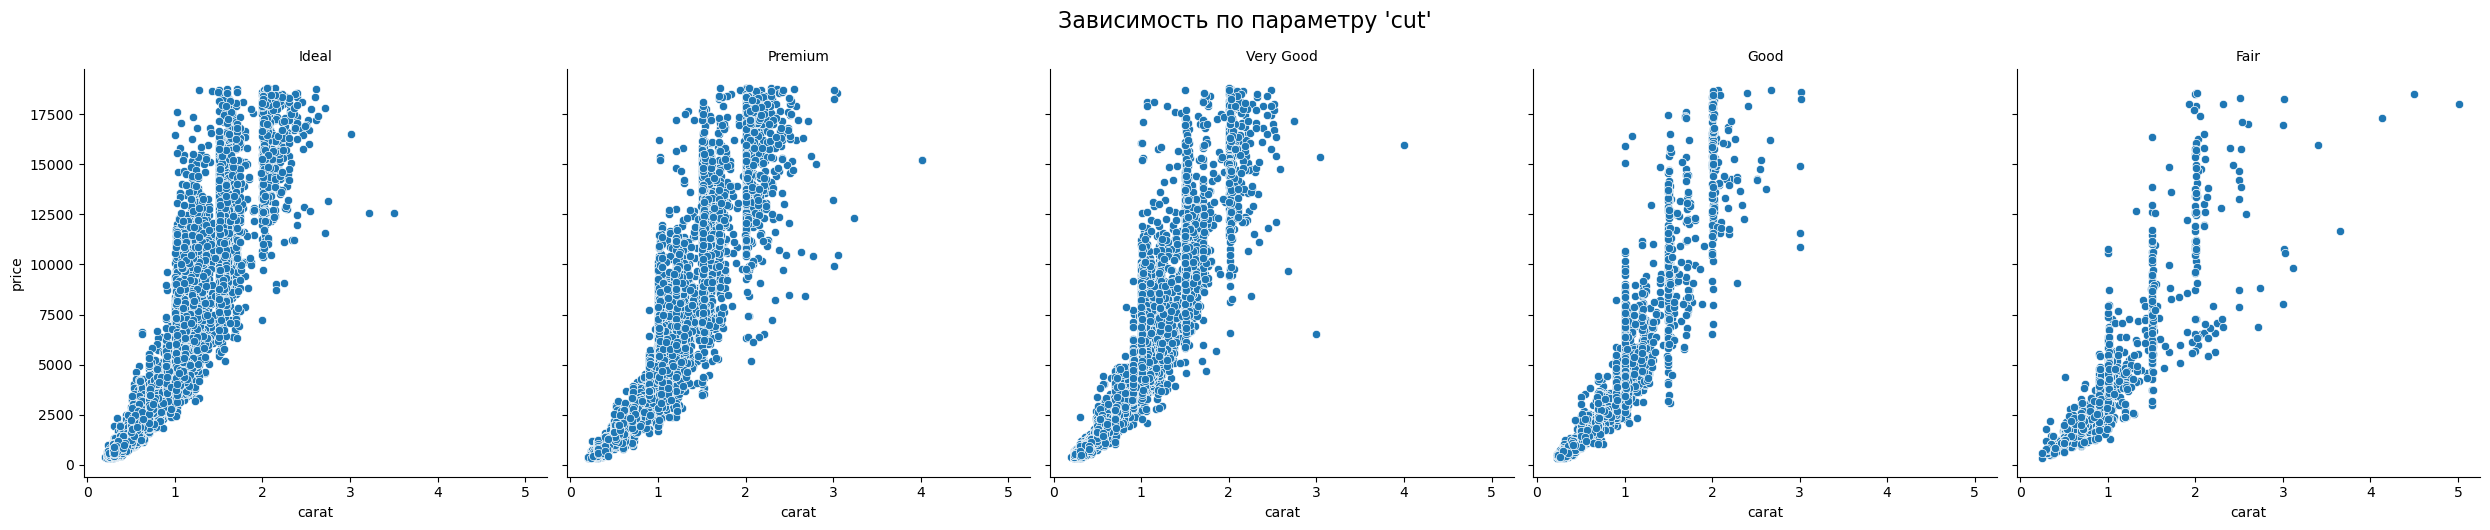

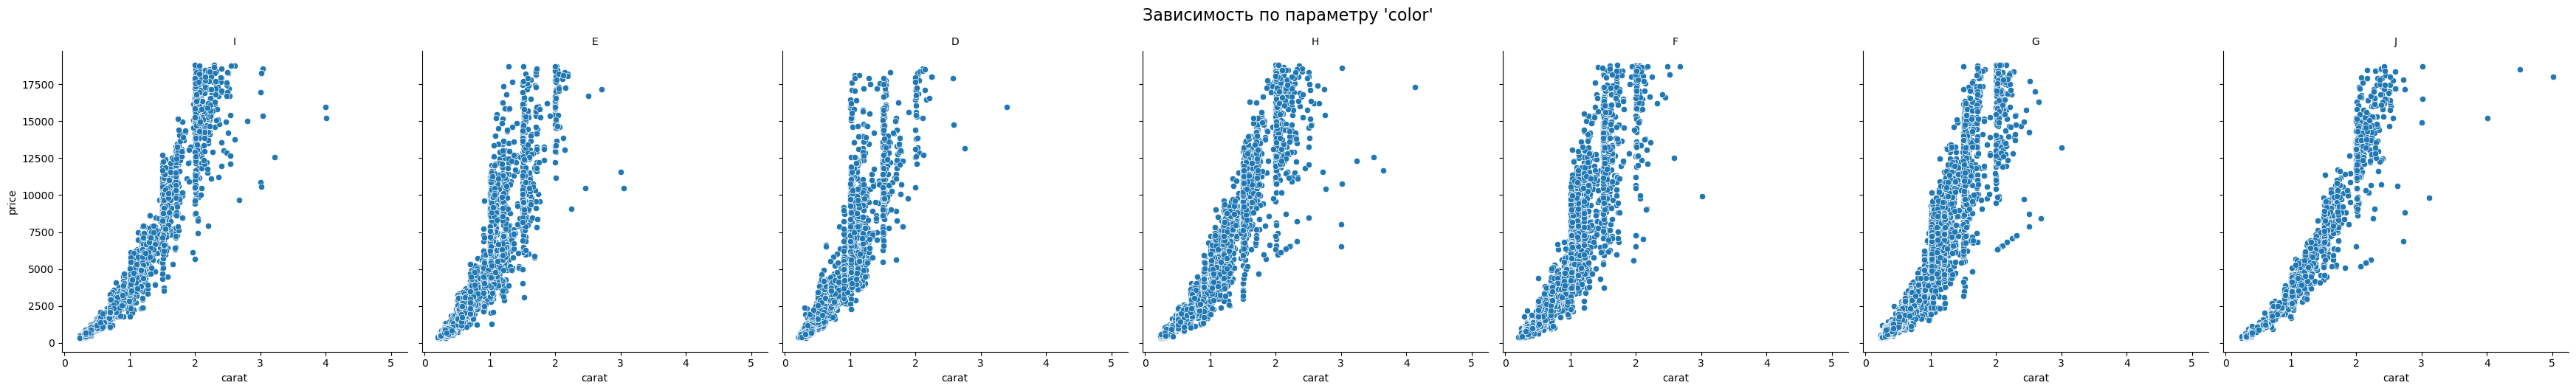

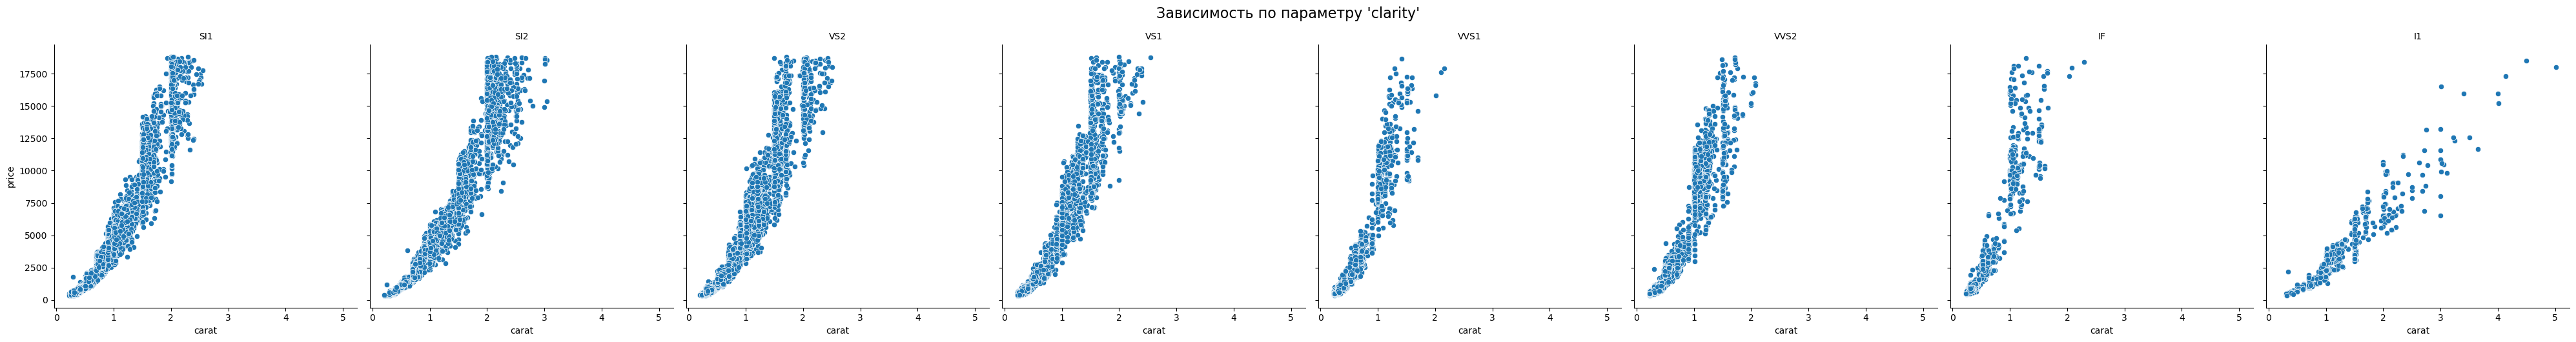

In [13]:
g = sns.relplot(data=df, x='carat', y='price', col='cut', kind='scatter')
g.set_titles("{col_name}")
g.fig.suptitle("Зависимость по параметру 'cut'", y=1.05, fontsize=16) 

g = sns.relplot(data=df, x='carat', y='price', col='color', kind='scatter')
g.set_titles("{col_name}")
g.fig.suptitle("Зависимость по параметру 'color'", y=1.05, fontsize=16)  

g = sns.relplot(data=df, x='carat', y='price', col='clarity', kind='scatter')
g.set_titles("{col_name}")
g.fig.suptitle("Зависимость по параметру 'clarity'", y=1.05, fontsize=16);

Нелинейность роста цен

In [14]:
display(df['cut'].unique(),
df['color'].unique(),
df['clarity'].unique())

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

array(['I', 'E', 'D', 'H', 'F', 'G', 'J'], dtype=object)

array(['SI1', 'SI2', 'VS2', 'VS1', 'VVS1', 'VVS2', 'IF', 'I1'],
      dtype=object)

Трансформер для предподготовки данных

In [15]:
def filter_by_depth_formula(df, formula_column='depth'):
    df['formula_result'] = round((2 * df['z'] / (df['x'] + df['y'])) * 100, 1)
    formula_condition = df[formula_column] == df['formula_result']
    filtered_df = df[formula_condition].drop(columns=['formula_result'])
    return filtered_df

In [16]:
df = filter_by_depth_formula(df, formula_column='depth')

In [17]:
X = df.drop('price',axis = 1)
y = df['price']

In [18]:
def filter_and_adjust_xyz_hierarchy(df):
    df[['x', 'y', 'z']] = df[['x', 'y', 'z']].apply(
        lambda row: pd.Series(sorted(row, reverse=True)), axis=1
    )
    return df

knn_tr = ColumnTransformer(
    [("knn_tr", KNNImputer(missing_values=0, n_neighbors=3), ['x', 'y', 'z'])],
    remainder="passthrough",
    verbose_feature_names_out=False,
    n_jobs=-1
).set_output(transform="pandas")

xyz_tr = ColumnTransformer(
    [("xyz_tr", FunctionTransformer(func = filter_and_adjust_xyz_hierarchy), ['x', 'y', 'z'])],
    remainder="passthrough",
    verbose_feature_names_out=False,
    n_jobs=-1
).set_output(transform="pandas")

knn_xyz_pipeline = Pipeline([
    ('Step_1', knn_tr),
    ('Step_2', xyz_tr)
])

In [19]:
knn_xyz_pipeline

Pipeline(steps=[('Step_1',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('knn_tr',
                                                  KNNImputer(missing_values=0,
                                                             n_neighbors=3),
                                                  ['x', 'y', 'z'])],
                                   verbose_feature_names_out=False)),
                ('Step_2',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('xyz_tr',
                                                  FunctionTransformer(func=<function filter_and_adjust_xyz_hierarchy at 0x14b0b4680>),
                                                  ['x', 'y', 'z'])],
                                   verbose_feature_names_out=False))])

In [20]:
knn_xyz_pipeline.fit_transform(X)

,x,y,z,carat,cut,color,clarity,depth,table
0,5.31,5.29,3.27,0.55,Ideal,I,SI1,61.7,55.0
1,6.27,6.24,3.90,0.94,Premium,E,SI1,62.4,56.0
2,4.49,4.47,2.69,0.33,Premium,E,SI2,60.0,59.0
3,4.45,4.40,2.63,0.31,Ideal,D,VS2,59.4,56.0
4,8.04,7.99,5.03,2.01,Very Good,H,SI1,62.8,59.0
...,...,...,...,...,...,...,...,...,...
40450,7.33,7.30,4.44,1.50,Very Good,D,SI1,60.7,62.0
40451,7.42,7.35,4.57,1.51,Ideal,D,SI1,61.9,57.0
40452,4.89,4.87,2.97,0.42,Ideal,G,SI2,60.9,56.0
40453,8.39,8.27,4.97,2.05,Premium,E,SI2,59.7,59.0


## Создадим метрику, по которой будем смотреть наши результаты

По модулю, тк так проще смотреть в таблице результатов  оптимальные параметры

In [21]:
def irq_mse(y_true, y_predict):   
    delta = y_predict - y_true    
    Q25 = np.quantile(delta, 0.25)
    Q75 = np.quantile(delta, 0.75)
    arq = Q75-Q25
    mask = (delta<(Q25 - 1.5*arq)) | (delta>(Q75 + 1.5*arq))
    if mask.sum() == 0:
        rez = 0
    else: rez = - np.sum((delta[mask])**2) / mask.sum()
    return abs(rez)

# Начнем применять трансформеры для колонок

Трансформер для кодирования наших данных

In [22]:
pol_transformer = ColumnTransformer(
    [("Poly_features",
             PolynomialFeatures(degree=2,include_bias=False), ['x','y','z']),
        ],remainder="passthrough",
    verbose_feature_names_out=False,
    n_jobs=-1
)

poly_pipline = Pipeline([
    ('Step_1',pol_transformer),
    ('Step_2',StandardScaler())
])

bins = make_pipeline(
    FeatureUnion(
        [
            ("kbin",
                KBinsDiscretizer(n_bins=10, strategy="uniform", encode="ordinal"),),]))



my_column_transformer = ColumnTransformer(
    [
        ("OrdinalEncoder_1",
             OrdinalEncoder(),['cut','color','clarity']),
        ("Poly_feat",
            poly_pipline,['x','y','z']),
        ("Scaling",
            StandardScaler(),['depth','table','carat']),
        ("Bins",
            bins,['carat'])
    ],remainder="passthrough",
    verbose_feature_names_out=False,
    n_jobs=-1
).set_output(transform="pandas")
my_column_transformer.fit_transform(X)

,cut,color,clarity,x,y,z,x^2,x y,x z,y^2,y z,z^2,depth,table,carat,kbin__carat
0,2.0,5.0,2.0,-0.387912,-0.374705,-0.383447,-0.451065,-0.445219,-0.449691,-0.439217,-0.443776,-0.447339,-0.031653,-1.130218,-0.518665,0.0
1,3.0,1.0,2.0,0.488218,0.461946,0.530277,0.396354,0.383248,0.420475,0.369681,0.407126,0.441127,0.471976,-0.675469,0.308736,1.0
2,3.0,1.0,3.0,-1.103120,-1.130390,-1.224654,-1.036317,-1.047307,-1.084580,-1.057869,-1.095399,-1.127254,-1.254751,0.688777,-0.985405,0.0
3,2.0,0.0,5.0,-1.138880,-1.193364,-1.311676,-1.063067,-1.084117,-1.130139,-1.104627,-1.150597,-1.190038,-1.686432,-0.675469,-1.027836,0.0
4,4.0,4.0,2.0,2.025915,2.081272,2.169181,2.231042,2.268792,2.334396,2.305342,2.372610,2.425899,0.759764,0.688777,2.578787,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,4.0,0.0,2.0,1.409048,1.442538,1.313470,1.441871,1.463171,1.388460,1.483552,1.408980,1.326936,-0.751122,2.053024,1.496800,3.0
40451,2.0,0.0,2.0,1.453749,1.523504,1.502016,1.496664,1.540350,1.531670,1.583520,1.575467,1.557319,0.112241,-0.220721,1.518015,3.0
40452,2.0,3.0,3.0,-0.763396,-0.752548,-0.818554,-0.770261,-0.766219,-0.794415,-0.761827,-0.790420,-0.815541,-0.607228,-0.675469,-0.794466,0.0
40453,3.0,1.0,3.0,2.383519,2.288186,2.082159,2.721145,2.655116,2.517874,2.587837,2.453242,2.307885,-1.470591,0.688777,2.663648,4.0


In [23]:
my_column_transformer

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('OrdinalEncoder_1', OrdinalEncoder(),
                                 ['cut', 'color', 'clarity']),
                                ('Poly_feat',
                                 Pipeline(steps=[('Step_1',
                                                  ColumnTransformer(n_jobs=-1,
                                                                    remainder='passthrough',
                                                                    transformers=[('Poly_features',
                                                                                   PolynomialFeatures(include_bias=False),
                                                                                   ['x',
                                                                                    'y',
                                                                                    'z'])],
                                                                    verbose_feature_names_out=False)),
                                                 ('Step_2', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('Scaling', StandardScaler(),
                                 ['depth', 'table', 'carat']),
                                ('Bins',
                                 Pipeline(steps=[('featureunion',
                                                  FeatureUnion(transformer_list=[('kbin',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   n_bins=10,
                                                                                                   strategy='uniform'))]))]),
                                 ['carat'])],
                  verbose_feature_names_out=False)

In [24]:
total_pipeline = Pipeline([
    ('first', knn_xyz_pipeline),
    ('second', my_column_transformer)
])

In [25]:
total_pipeline.fit_transform(X)

,cut,color,clarity,x,y,z,x^2,x y,x z,y^2,y z,z^2,depth,table,carat,kbin__carat
0,2.0,5.0,2.0,-0.391301,-0.371440,-0.383447,-0.454054,-0.445219,-0.451178,-0.436335,-0.442316,-0.447339,-0.031653,-1.130218,-0.518665,0.0
1,3.0,1.0,2.0,0.466501,0.484012,0.530277,0.374110,0.383248,0.409234,0.392330,0.418472,0.441127,0.471976,-0.675469,0.308736,1.0
2,3.0,1.0,3.0,-1.124007,-1.109830,-1.224654,-1.052708,-1.047307,-1.092680,-1.041801,-1.087385,-1.127254,-1.254751,0.688777,-0.985405,0.0
3,2.0,0.0,5.0,-1.159749,-1.172864,-1.311676,-1.079348,-1.084117,-1.138144,-1.088774,-1.142706,-1.190038,-1.686432,-0.675469,-1.027836,0.0
4,4.0,4.0,2.0,2.048074,2.059846,2.169181,2.261011,2.268792,2.349686,2.276279,2.357555,2.425899,0.759764,0.688777,2.578787,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,4.0,0.0,2.0,1.413657,1.438517,1.313470,1.448052,1.463171,1.391366,1.478132,1.406257,1.326936,-0.751122,2.053024,1.496800,3.0
40451,2.0,0.0,2.0,1.494076,1.483541,1.502016,1.546946,1.540350,1.556936,1.533548,1.550278,1.557319,0.112241,-0.220721,1.518015,3.0
40452,2.0,3.0,3.0,-0.766589,-0.749640,-0.818554,-0.773197,-0.766219,-0.795911,-0.759162,-0.788995,-0.815541,-0.607228,-0.675469,-0.794466,0.0
40453,3.0,1.0,3.0,2.360814,2.311979,2.082159,2.689403,2.655116,2.502257,2.620712,2.469128,2.307885,-1.470591,0.688777,2.663648,4.0


## Построение регресии c помощью ближайших соседей

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size= .7, test_size= .3)
X_train.head(3)

,carat,cut,color,clarity,depth,table,x,y,z
2721,0.30,Ideal,E,VVS2,61.6,57.0,4.32,4.29,2.65
22352,1.25,Very Good,H,VS2,60.3,54.0,7.00,7.03,4.23
39585,0.91,Premium,E,I1,59.6,59.0,6.32,6.29,3.76


`HalvingGridSearchCV — это версия GridSearchCV, которая ускоряет процесс подбора гиперпараметров, постепенно отбирая лучшие комбинации параметров в процессе обучения.`

поэтому использую HalvingGridSearchCV и не жду миллиард часов

In [27]:
cv = KFold(n_splits = 5, shuffle=False)
scaling = [MinMaxScaler(), RobustScaler(), Normalizer(), StandardScaler()]

pipe_knn = Pipeline([('preprocessing', total_pipeline), 
                     ('classifier', KNeighborsRegressor())])

n_neighbors = [5,10,15]
p = [1,2,3]
weights = ['uniform', 'distance']

param_grid =[
    {'classifier': [KNeighborsRegressor()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights,
     'preprocessing__second__Scaling': scaling,
     'preprocessing__second__Poly_feat__Step_2':scaling
      }
]

irq_mse_scorer = make_scorer(irq_mse)

grid_knn = HalvingGridSearchCV(pipe_knn, param_grid, cv = cv, scoring=irq_mse_scorer, n_jobs = -1, return_train_score=True, verbose = 1, factor = 3)
grid_knn.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 108
max_resources_: 26278
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 288
n_resources: 108
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 1
n_candidates: 96
n_resources: 324
Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/annavasilenko/Applications/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 2
n_candidates: 32
n_resources: 972
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 3
n_candidates: 11
n_resources: 2916
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 4
n_candidates: 4
n_resources: 8748
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/annavasilenko/Applications/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


HalvingGridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=Pipeline(steps=[('preprocessing',
                                               Pipeline(steps=[('first',
                                                                Pipeline(steps=[('Step_1',
                                                                                 ColumnTransformer(n_jobs=-1,
                                                                                                   remainder='passthrough',
                                                                                                   transformers=[('knn_tr',
                                                                                                                  KNNImputer(missing_values=0,
                                                                                                                             n_neighbors=3),
                                                                                                                  ['x',
                                                                                                                   'y',
                                                                                                                   'z'])],
                                                                                                   verbose_feature_names_out=False)),
                                                                                ('Step_2',
                                                                                 Colu...
                                 'classifier__n_neighbors': [5, 10, 15],
                                 'classifier__p': [1, 2, 3],
                                 'classifier__weights': ['uniform', 'distance'],
                                 'preprocessing__second__Poly_feat__Step_2': [MinMaxScaler(),
                                                                              RobustScaler(),
                                                                              Normalizer(),
                                                                              StandardScaler()],
                                 'preprocessing__second__Scaling': [MinMaxScaler(),
                                                                    RobustScaler(),
                                                                    Normalizer(),
                                                                    StandardScaler()]}],
                    scoring=make_scorer(irq_mse, response_method='predict'),
                    verbose=1)

In [28]:
tables_knn = (
pd.DataFrame(grid_knn.cv_results_)
    .sort_values(
    ["mean_test_score", "mean_train_score"],
    ascending=[True, True],
    ).dropna().T
)
tables_knn

,101,223,116,221,100,143,103,159,19,110,...,381,383,305,302,370,359,343,344,349,355
iter,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
n_resources,108,108,108,108,108,108,108,108,108,108,...,324,324,324,324,324,324,324,324,324,324
mean_fit_time,0.035355,0.03661,0.033473,0.036914,0.028642,0.030241,0.033058,0.031734,0.026111,0.026082,...,0.038618,0.031525,0.051748,0.041025,0.047277,0.046222,0.039857,0.042515,0.0398,0.04198
std_fit_time,0.016464,0.008376,0.010092,0.005457,0.004149,0.010491,0.006764,0.013718,0.006774,0.002345,...,0.013118,0.009962,0.014694,0.016421,0.009519,0.012921,0.008293,0.013322,0.0069,0.009308
mean_score_time,0.022995,0.030641,0.026311,0.02242,0.020071,0.021014,0.026344,0.020831,0.026087,0.023785,...,0.027195,0.016676,0.033742,0.026358,0.03164,0.027865,0.024117,0.02906,0.026577,0.031745
std_score_time,0.004009,0.006268,0.007297,0.00214,0.004206,0.006667,0.006284,0.004587,0.014353,0.008591,...,0.009762,0.00539,0.011043,0.002495,0.010245,0.002232,0.006564,0.002838,0.003463,0.00687
param_classifier,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),...,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor()
param_classifier__n_neighbors,10,15,10,15,10,10,10,10,5,10,...,15,15,10,10,15,15,10,10,10,10
param_classifier__p,1,1,1,1,1,2,1,2,1,1,...,3,3,3,3,3,3,2,3,3,1
param_classifier__weights,uniform,distance,distance,distance,uniform,uniform,uniform,distance,distance,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform


In [29]:
tables_knn[101]['params']

{'classifier': KNeighborsRegressor(),
 'classifier__n_neighbors': 10,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'preprocessing__second__Poly_feat__Step_2': RobustScaler(),
 'preprocessing__second__Scaling': RobustScaler()}

In [30]:
best_est_knn = grid_knn.best_estimator_
new_processor_knn = best_est_knn.named_steps["preprocessing"]

In [31]:
new_processor_knn

Pipeline(steps=[('first',
                 Pipeline(steps=[('Step_1',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('knn_tr',
                                                                   KNNImputer(missing_values=0,
                                                                              n_neighbors=3),
                                                                   ['x', 'y',
                                                                    'z'])],
                                                    verbose_feature_names_out=False)),
                                 ('Step_2',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('xyz_tr',
                                                                   FunctionTransformer(func=<function filter_and...
                                                                                                    PolynomialFeatures(include_bias=False),
                                                                                                    ['x',
                                                                                                     'y',
                                                                                                     'z'])],
                                                                                     verbose_feature_names_out=False)),
                                                                  ('Step_2',
                                                                   Normalizer())]),
                                                  ['x', 'y', 'z']),
                                                 ('Scaling', RobustScaler(),
                                                  ['depth', 'table', 'carat']),
                                                 ('Bins',
                                                  Pipeline(steps=[('featureunion',
                                                                   FeatureUnion(transformer_list=[('kbin',
                                                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                                                    n_bins=10,
                                                                                                                    strategy='uniform'))]))]),
                                                  ['carat'])],
                                   verbose_feature_names_out=False))])

In [32]:
new_processor_knn.set_params(
    second__Scaling = MinMaxScaler(),
    second__Poly_feat__Step_2 = MinMaxScaler()
)

Pipeline(steps=[('first',
                 Pipeline(steps=[('Step_1',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('knn_tr',
                                                                   KNNImputer(missing_values=0,
                                                                              n_neighbors=3),
                                                                   ['x', 'y',
                                                                    'z'])],
                                                    verbose_feature_names_out=False)),
                                 ('Step_2',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('xyz_tr',
                                                                   FunctionTransformer(func=<function filter_and...
                                                                                                    PolynomialFeatures(include_bias=False),
                                                                                                    ['x',
                                                                                                     'y',
                                                                                                     'z'])],
                                                                                     verbose_feature_names_out=False)),
                                                                  ('Step_2',
                                                                   MinMaxScaler())]),
                                                  ['x', 'y', 'z']),
                                                 ('Scaling', MinMaxScaler(),
                                                  ['depth', 'table', 'carat']),
                                                 ('Bins',
                                                  Pipeline(steps=[('featureunion',
                                                                   FeatureUnion(transformer_list=[('kbin',
                                                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                                                    n_bins=10,
                                                                                                                    strategy='uniform'))]))]),
                                                  ['carat'])],
                                   verbose_feature_names_out=False))])

In [33]:
pipe_best = make_pipeline(new_processor_knn, KNeighborsRegressor(n_neighbors = 6, p = 1, weights = 'distance'))
pipe_best.fit(X_train, y_train)

/Users/annavasilenko/Applications/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('first',
                                  Pipeline(steps=[('Step_1',
                                                   ColumnTransformer(n_jobs=-1,
                                                                     remainder='passthrough',
                                                                     transformers=[('knn_tr',
                                                                                    KNNImputer(missing_values=0,
                                                                                               n_neighbors=3),
                                                                                    ['x',
                                                                                     'y',
                                                                                     'z'])],
                                                                     verbose_feature_names_out=False)),
                                                  ('Step_2',
                                                   ColumnTransformer(n_jobs=-1,
                                                                     remainder='passthrough',
                                                                     transformers=[('xyz_tr',
                                                                                    FunctionTransfor...
                                                                                    MinMaxScaler())]),
                                                                   ['x', 'y',
                                                                    'z']),
                                                                  ('Scaling',
                                                                   MinMaxScaler(),
                                                                   ['depth',
                                                                    'table',
                                                                    'carat']),
                                                                  ('Bins',
                                                                   Pipeline(steps=[('featureunion',
                                                                                    FeatureUnion(transformer_list=[('kbin',
                                                                                                                    KBinsDiscretizer(encode='ordinal',
                                                                                                                                     n_bins=10,
                                                                                                                                     strategy='uniform'))]))]),
                                                                   ['carat'])],
                                                    verbose_feature_names_out=False))])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=6, p=1, weights='distance'))])

In [34]:
y_pred_knn = pipe_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)

Mean Squared Error: 362278.5395774019


In [35]:
print("Наша метрика:",irq_mse(y_test, y_pred_knn))

Наша метрика: 2165667.531420652


In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_knn)
r2

0.9773078064143925

Подставила такие параметры (а именно `second__Scaling = MinMaxScaler()`,`second__Poly_feat__Step_2 = MinMaxScaler()`,`n_neighbors`, `p = 1`, `weights = 'distance'`)  потому что они стабильнее всего показывали хорошие метрики

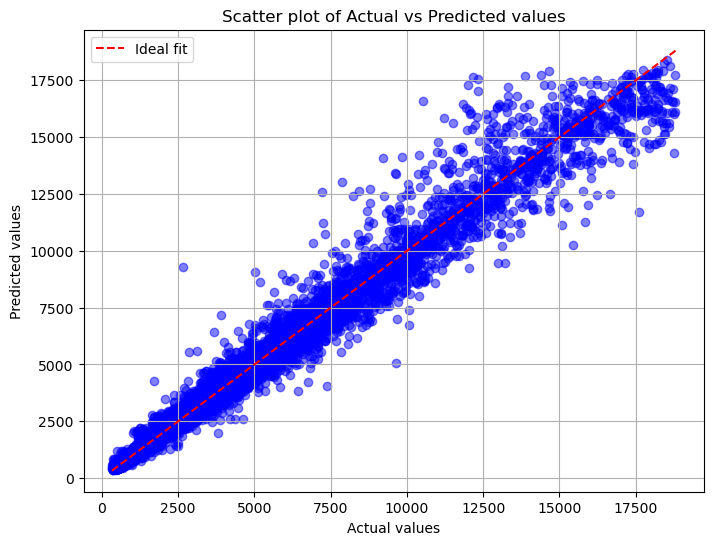

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal fit")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatter plot of Actual vs Predicted values")
plt.legend()
plt.grid(True)
plt.show()